<h1 align=center><font size = 5>AUTOENCODERS</font></h1>

<hr>

Welcome to this notebook about autoencoders.
<div class="alert alert-block alert-info" style="margin-top: 20px">
<font size = 3><strong>In this notebook you will find an explanation of what is an autoencoder, how it works, and see an implementation of an autoencoder in TensorFlow. 
</strong></font>
<br>
- <p><a href="#ref1">Introduction</a></p>
- <p><a href="#ref2">Feature Extraction and Dimensionality Reduction</a></p>
- <p><a href="#ref3">Autoencoder Structure</a></p>
- <p><a href="#ref4">Performance</a></p>
- <p><a href="#ref5">Training: Loss Function</a></p>
- <p><a href="#ref6">Code</a></p>
<p></p>
By the end of this notebook, you should be able to create simple autoencoders and how to apply them in problems.
</div>
<br>



----------------


<a id="ref1"></a>
# Introduction
An autoencoder, also known as autoassociator or Diabolo networks, is a artificial neural network employed to recreate the given input.
It takes a set of **unlabeled** inputs, encodes them and then tries to extract the most valuable information from them.
They are used for feature extraction, learning generative models of data, dimensionality reduction and can be used for compression. 

A 2006 paper named Reducing the Dimensionality of Data with Neural Networks, done by G. E. Hinton and R. R. Salakhutdinov, showed better results than years of refining other types of network, and was a breakthrough in the field of Neural Networks, a field that was "stagnant" for 10 years.

Now, autoencoders, based on Restricted Boltzmann Machines, are employed in some of the largest deep learning applications. They are the building blocks of Deep Belief Networks (DBN).

<img src = "https://ibm.box.com/shared/static/xlkv9v7xzxhjww681dq3h1pydxcm4ktp.png" style="width: 350px;"/>

------------------------

<a id="ref2"></a>
# Feature Extraction and Dimensionality Reduction

An example given by Nikhil Buduma in KdNuggets (<a href="http://www.kdnuggets.com/2015/03/deep-learning-curse-dimensionality-autoencoders.html">link</a>) can explain the utility of this type of Neural Network with excellence.

Say that you want to extract what feeling the person in a photography is feeling. Using as an example the following 256x256 grayscale picture:

<img src = "https://ibm.box.com/shared/static/r5knpow4bk2farlvxia71e9jp2f2u126.png" />

But then we start facing a bottleneck! This image being 256x256 correspond with an input vector of 65536 dimensions! If we used an image produced with convential cellphone cameras, that generates images of 4000 x 3000 pixels, we would have 12 million dimensions to analyse.


This bottleneck is further problematized as the difficulty of a machine learning problem is increased as more dimensions are involved. According to a 1982 study by C.J. Stone (<a href="http://www-personal.umich.edu/~jizhu/jizhu/wuke/Stone-AoS82.pdf">link</a>), the time to fit a model, at best, is:


<div class="alert alert-block alert-info" style="margin-top: 20px">
<center><font size = 6><strong>$m^{-p/(2p+d)}$</strong></font></center>
<br>
Where:
<br>
m: Number of data points
<br>
d: Dimensionality of the data
<br>
p: Parameter that depends on the model
</div>

As you can see, it increases exponentially!
Returning to our example, we don't need to use all of the 65,536 dimensions to classify an emotion. A human identify emotions according to some specific facial expression, some **key features**, like the shape of the mouth and eyebrows.

<img src="https://ibm.box.com/shared/static/m8urvuqujkt2vt1ru1fnslzh24pv7hn4.png" height="256" width="256"/>

--------------------------------------

<a id="ref3"></a>
# Autoencoder Structure

<img src="https://ibm.box.com/shared/static/no7omt2jhqvv7uuls7ihnzikyl9ysnfp.png" style="width: 400px;"/>

An autoencoder can be divided in two parts, the **encoder** and the **decoder**.

The encoder needs to compress the representation of an input. In this case we are going to compress the face of our actor, that consists of 2000 dimensional data to only 30 dimensions, taking some steps between this compression.

The decoder is a reflection of the encoder network. It works to recreate the input, as closely as possible. It has an important role during training, to force the autoencoder to select the most important features in the compressed representation.


--------------------------------------

<a id="ref4"></a>
# Performance

After the training has been done, you can use the encoded data as a reliable dimensionally-reduced data, applying it to any problems that a dimensionality reduction problem seem to fit.

<img src="https://ibm.box.com/shared/static/yt3xyon4g2jyw1w9qup1mvx7cgh28l64.png">

This image was extracted from the Hinton paper comparing the two-dimensional reduction for 500 digits of the MNIST, with PCA on the left and autoencoder on the right. We can see that the autoencoder provided us with a better separation of data.

-------------------

<a id="ref5"></a>
# Training: Loss function

An autoencoder uses the Loss function to properly train the network. The Loss function will calculate the differences between our output and the expected results. After that, we can minimize this error doing gradient descent. There are more than one type of Loss function, it depends on the type of data.

### Binary Values:
$$l(f(x)) = - \sum_{k} (x_k log(\hat{x}_k) + (1 - x_k) \log (1 - \hat{x}_k) \ )$$

For binary values, we can use an equation based on the sum of Bernoulli's cross-entropy. 

$x_k$ is one of our inputs and $\hat{x}_k$ is the respective output.

We use this function so that if $x_k$ equals to one, we want to push $\hat{x}_k$ as close as possible to one. The same if $x_k$ equals to zero.

If the value is one, we just need to calculate the first part of the formula, that is, $- x_k log(\hat{x}_k)$. Which, turns out to just calculate $- log(\hat{x}_k)$.

And if the value is zero, we need to calculate just the second part, $(1 - x_k) \log (1 - \hat{x}_k) \ )$ - which turns out to be $log (1 - \hat{x}_k) $.



### Real values:
$$l(f(x)) = - 1/2\sum_{k} (\hat{x}_k- x_k \ )^2$$

As the above function would behave badly with inputs that are not 0 or 1, we can use the sum of squared differences for our Loss function. If you use this loss function, it's necessary that you use a linear activation function for the output layer.

As it was with the above example, $x_k$ is one of our inputs and $\hat{x}_k$ is the respective output, and we want to make our output as similar as possible to our input.

### Loss Gradient:

$$\nabla_{\hat{a}(x^{(t)})} \ l( \ f(x^{(t)}))  = \hat{x}^{(t)} - x^{(t)} $$

We use the gradient descent to reach the local minumum of our function $l( \ f(x^{(t)})$, taking steps towards the negative of the gradient of the function in the current point.

Our function talks about the preactivation of the output layer $(\nabla_{\hat{a}(x^{(t)})})$ of the loss $l( \ f(x^{(t)})$.

It's actually a simple formula, it just calculates the difference between our output $\hat{x}^{(t)}$ and our input $x^{(t)}$.

Then our network just backpropagates our gradient $\nabla_{\hat{a}(x^{(t)})} \ l( \ f(x^{(t)}))$ through the network using **backpropagation**.

-------------------

<a id="ref6"></a>
# Code

For this part, we walk through a lot of Python 2.7.11 code. We are going to use the MNIST dataset for our example.
The following code was created by Aymeric Damien. You can find some of his code in [here](https://github.com/aymericdamien). There are just some modifications for us to import the datasets to Jupyter Notebooks.

Let's call our imports and make the MNIST data available to use.

In [1]:
from __future__ import division, print_function, absolute_import

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Import MINST data
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("/tmp/data/", one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /tmp/data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


Now, let's give the parameters that are going to be used by our NN.

In [2]:
learning_rate = 0.01
training_epochs = 20
batch_size = 256
display_step = 1
examples_to_show = 10

# Network Parameters
n_hidden_1 = 256 # 1st layer num features
n_hidden_2 = 128 # 2nd layer num features
n_input = 784 # MNIST data input (img shape: 28*28)

# tf Graph input (only pictures)
X = tf.placeholder("float", [None, n_input])

weights = {
    'encoder_h1': tf.Variable(tf.random_normal([n_input, n_hidden_1])),
    'encoder_h2': tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2])),
    'decoder_h1': tf.Variable(tf.random_normal([n_hidden_2, n_hidden_1])),
    'decoder_h2': tf.Variable(tf.random_normal([n_hidden_1, n_input])),
}
biases = {
    'encoder_b1': tf.Variable(tf.random_normal([n_hidden_1])),
    'encoder_b2': tf.Variable(tf.random_normal([n_hidden_2])),
    'decoder_b1': tf.Variable(tf.random_normal([n_hidden_1])),
    'decoder_b2': tf.Variable(tf.random_normal([n_input])),
}

Now we need to create our encoder. For this, we are going to use sigmoidal functions. Sigmoidal functions continue to deliver great results with this type of networks. This is due to having a good derivative that is well-suited to backpropagation. We can create our encoder using the sigmoidal function like this:

In [3]:
# Building the encoder
def encoder(x):
    # Encoder first layer with sigmoid activation #1
    layer_1 = tf.nn.sigmoid(tf.add(tf.matmul(x, weights['encoder_h1']),
                                   biases['encoder_b1']))
    # Encoder second layer with sigmoid activation #2
    layer_2 = tf.nn.sigmoid(tf.add(tf.matmul(layer_1, weights['encoder_h2']),
                                   biases['encoder_b2']))
    return layer_2

And the decoder:

You can see that the layer_1 in the encoder is the layer_2 in the decoder and vice-versa.

In [4]:
# Building the decoder
def decoder(x):
    # Decoder first layer with sigmoid activation #1
    layer_1 = tf.nn.sigmoid(tf.add(tf.matmul(x, weights['decoder_h1']),
                                   biases['decoder_b1']))
    # Decoder second layer with sigmoid activation #2
    layer_2 = tf.nn.sigmoid(tf.add(tf.matmul(layer_1, weights['decoder_h2']),
                                   biases['decoder_b2']))
    return layer_2

Let's construct our model.
In the variable `cost` we have the loss function and in the `optimizer` variable we have our gradient used for backpropagation.

In [5]:
# Construct model
encoder_op = encoder(X)
decoder_op = decoder(encoder_op)

# Prediction
y_pred = decoder_op
# Targets (Labels) are the input data.
y_true = X

# Define loss and optimizer, minimize the squared error
cost = tf.reduce_mean(tf.pow(y_true - y_pred, 2))
optimizer = tf.train.RMSPropOptimizer(learning_rate).minimize(cost)

# Initializing the variables
init = tf.global_variables_initializer()

The training will run for 20 epochs.

In [6]:
# Launch the graph
# Using InteractiveSession (more convenient while using Notebooks)
sess = tf.InteractiveSession()
sess.run(init)

total_batch = int(mnist.train.num_examples/batch_size)
# Training cycle
for epoch in range(training_epochs):
    # Loop over all batches
    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        # Run optimization op (backprop) and cost op (to get loss value)
        _, c = sess.run([optimizer, cost], feed_dict={X: batch_xs})
    # Display logs per epoch step
    if epoch % display_step == 0:
        print("Epoch:", '%04d' % (epoch+1),
              "cost=", "{:.9f}".format(c))

print("Optimization Finished!")

Epoch: 0001 cost= 0.197521567
Epoch: 0002 cost= 0.165685579
Epoch: 0003 cost= 0.149283886
Epoch: 0004 cost= 0.141155839
Epoch: 0005 cost= 0.136601433
Epoch: 0006 cost= 0.129927844
Epoch: 0007 cost= 0.127251491
Epoch: 0008 cost= 0.118471555
Epoch: 0009 cost= 0.117739774
Epoch: 0010 cost= 0.115122728
Epoch: 0011 cost= 0.114437476
Epoch: 0012 cost= 0.109157719
Epoch: 0013 cost= 0.107246600
Epoch: 0014 cost= 0.106821209
Epoch: 0015 cost= 0.104592457
Epoch: 0016 cost= 0.105341949
Epoch: 0017 cost= 0.105882719
Epoch: 0018 cost= 0.105497643
Epoch: 0019 cost= 0.102043271
Epoch: 0020 cost= 0.099949971
Optimization Finished!


Now, let's apply encode and decode for our tests.

In [7]:
# Applying encode and decode over test set
encode_decode = sess.run(
    y_pred, feed_dict={X: mnist.test.images[:examples_to_show]})

Let's simply visualize our graphs!

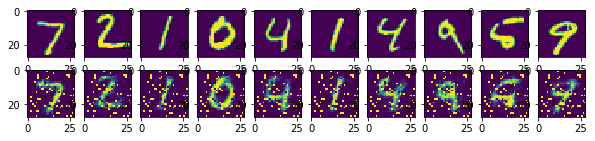

In [8]:
# Compare original images with their reconstructions
f, a = plt.subplots(2, 10, figsize=(10, 2))
for i in range(examples_to_show):
    a[0][i].imshow(np.reshape(mnist.test.images[i], (28, 28)))
    a[1][i].imshow(np.reshape(encode_decode[i], (28, 28)))

As you can see, the reconstructions were successful. It can be seen that some noise was added to the image.

### References:
- https://en.wikipedia.org/wiki/Autoencoder
- http://ufldl.stanford.edu/tutorial/unsupervised/Autoencoders/
- http://www.slideshare.net/billlangjun/simple-introduction-to-autoencoder
- http://www.slideshare.net/danieljohnlewis/piotr-mirowski-review-autoencoders-deep-learning-ciuuk14
- https://cs.stanford.edu/~quocle/tutorial2.pdf
- https://gist.github.com/hussius/1534135a419bb0b957b9
- http://www.deeplearningbook.org/contents/autoencoders.html
- http://www.kdnuggets.com/2015/03/deep-learning-curse-dimensionality-autoencoders.html/
- https://www.youtube.com/watch?v=xTU79Zs4XKY
- http://www-personal.umich.edu/~jizhu/jizhu/wuke/Stone-AoS82.pdf
- Reducing the Dimensionality of Data with Neural Networks, G. E. Hinton, R. R. Salakhutdinov, Science  28 Jul 2006, Vol. 313, Issue 5786, pp. 504-507, DOI: 10.1126/science.1127647 - http://science.sciencemag.org/content/313/5786/504.full